In [164]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from cycler import cycler
import numpy as np

mpl.rc('font', **{'family':'serif', 'serif':['Times New Roman']})
mpl.rc('font', size=8)
mpl.rc('legend', fontsize=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Data for the bar chart
scenes = [
    "Box", "Bookshelf\nSmall", "Bookshelf\nTall", "Bookshelf\nThin",
    "Cage", "Kitchen", "Table Bars", "Table Pick", "Table Under"
]

sigopt_best = np.array([39.7, 18.9, 22.3, 52.6, 62.9, 51.7, 33.9, 34.2, 36.4])
sigopt_path = np.array([2.79, 1.16, 1.56, 3.74, 4.58, 4.05, 3.08, 2.04, 3.83])
sigopt_nll = np.array([853, 462, 502, 1438, 1318, 1461, 746, 748, 964])

svmp_best = np.array([46.6, 24.1, 26.1, 67.2, 69.7, 63.7, 39.5, 40.8, 52.0])
svmp_path = np.array([3.31, 1.42, 1.59, 5.14, 4.46, 4.66, 2.78, 2.99, 3.73])
svmp_nll = np.array([1186, 786, 734, 2011, 1708, 2025, 1040, 1044, 1429])

bgd_best = np.array([46.7, 24.3, 26.2, 67.2, 69.7, 63.7, 39.6, 40.9, 51.9])
bgd_path = np.array([3.31, 1.42, 1.60, 5.14, 4.46, 4.66, 2.79, 2.99, 3.74])
bgd_nll = np.array([1188, 791, 737, 2011, 1711, 2020, 1044, 1046, 1431])

# Error bars for each category
sigopt_best_error = np.array([0.2, 0.2, 0.7, 4.5, 0.1, 2.0, 1.1, 0.1, 0.9])
sigopt_path_error = np.array([0.22, 0.06, 0.19, 0.62, 0.25, 0.21, 0.31, 0.14, 0.19])
sigopt_nll_error = np.array([14, 32, 17, 66, 20, 93, 74, 51, 50])

svmp_best_error = np.array([1.9, 2.3, 1.9, 7.0, 1.6, 2.9, 1.3, 1.6, 1.9])
svmp_path_error = np.array([0.30, 0.21, 0.28, 1.08, 0.39, 0.46, 0.30, 0.39, 0.40])
svmp_nll_error = np.array([53, 56, 42, 83, 56, 55, 61, 60, 49])

bgd_best_error = np.array([1.8, 2.2, 1.9, 7.0, 1.7, 2.9, 1.3, 1.5, 1.9])
bgd_path_error = np.array([0.30, 0.21, 0.28, 1.08, 0.39, 0.46, 0.66, 0.39, 0.40])
bgd_nll_error = np.array([53, 59, 41, 83, 59, 62, 59, 59, 48])

In [195]:
# Create separate plots for each score type
def create_bar_chart(data1, data2, data3, error1, error2, error3, y_label, filename):
    x = np.arange(len(scenes))
    width = 0.25

    # Create the figure and axes objects, specify the size and the dots per inches 
    cm = 1/2.54  # centimeters in inches
    fig, ax = plt.subplots(figsize=(17.4*cm, 5.5*cm), dpi = 96)
    
    # Colours - Choose the extreme colours of the colour map
    custom_cycler = cycler(color=['#66c2a5','#fc8d62','#8da0cb'])
    plt.rc('axes', prop_cycle=custom_cycler)

#     # Colormap - Build the colour maps
#     cmap1 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours1, N=256)
#     cmap2 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours2, N=256)
#     cmap3 = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours3, N=256)

#     # linearly normalizes data into the [0.0, 1.0] interval
#     norm1 = mpl.colors.Normalize(data1.min(), data1.max())
#     norm2 = mpl.colors.Normalize(data2.min(), data2.max())
#     norm3 = mpl.colors.Normalize(data3.min(), data3.max())

    bar1 = ax.bar(x - width, data1, width, yerr=error1, label='SigOpt', zorder=2)
    bar2 = ax.bar(x, data2, width, yerr=error2, label='SVMP', zorder=2)
    bar3 = ax.bar(x + width, data3, width, yerr=error3, label='Batch Gradient Descent', zorder=2)

    # Create the grid 
    ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

    # Reformat x-axis label and tick labels
    ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelrotation=0)
    ax.set_xticks(x, scenes) # Map integers numbers from the series to labels list

    # Reformat y-axis
    ax.set_ylabel('Delay (minutes)', labelpad=10)
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False)

    # Add label on top of each bar
#     ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in data1], padding=3, color='black', fontsize=8) 
#     ax.bar_label(bar2, labels=[f'{e:,.1f}' for e in data2], padding=3, color='black', fontsize=8) 
#     ax.bar_label(bar3, labels=[f'{e:,.1f}' for e in data3], padding=3, color='black', fontsize=8) 

    # Remove the spines
    ax.spines[['top','left','bottom']].set_visible(False)

    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)

    # Adjust the margins around the plot area
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

    # Set a white background
    fig.patch.set_facecolor('white')
    
    ax.set_ylabel(y_label)
    leg = plt.legend(loc="upper left")
    leg.get_frame().set_linewidth(0.0)
    
    min_scores = [min(scores) for scores in zip(data1, data2, data3)]

    for i, score in enumerate(min_scores):
        if score == data1[i]:
            bar1[i].set_hatch("///")
            bar1[i].set_edgecolor("w")
        elif score == data2[i]:
            bar2[i].set_hatch("///")
            bar2[i].set_edgecolor("w")
        elif score == data3[i]:
            bar3[i].set_hatch("///")
            bar3[i].set_edgecolor("w")

    plt.tight_layout()
    plt.savefig(filename)

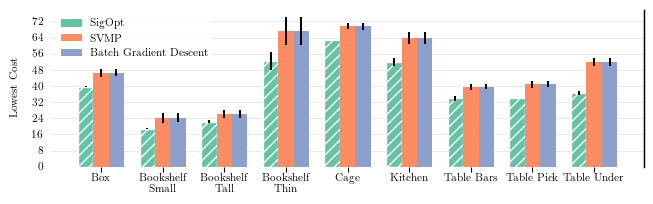

In [196]:
create_bar_chart(sigopt_best, svmp_best, bgd_best, sigopt_best_error, svmp_best_error, bgd_best_error, "Lowest Cost", "robot_best.pdf")

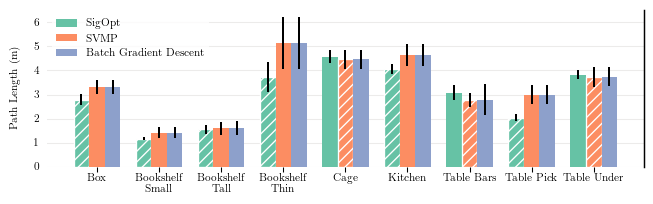

In [197]:
create_bar_chart(sigopt_path, svmp_path, bgd_path, sigopt_path_error, svmp_path_error, bgd_path_error, "Path Length (m)", "robot_length.pdf")

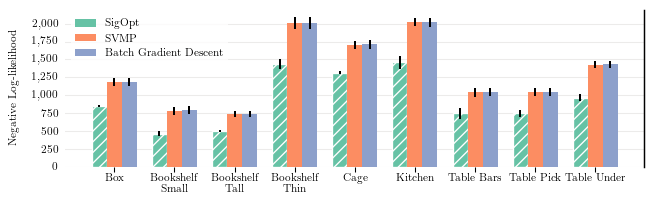

In [198]:
create_bar_chart(sigopt_nll, svmp_nll, bgd_nll, sigopt_nll_error, svmp_nll_error, bgd_nll_error, "Negative Log-likelihood", "robot_nll.pdf")